In [2]:
### Import required libraries

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import os

In [3]:
### Make sure that 'ggplot' style is used for all plots
plt.style.use('ggplot')
# plt.style.available ### To view all other available styles

In [4]:
### Set Working Directory (WD)
os.chdir('/Volumes/GoogleDrive/My Drive/CEMEX/Data Translators/GitHub/rgamerosl/capstone-project')

In [5]:
# ### How to import RDS (equivalent to RData) into pandas

# import rpy2.robjects as robjects
# from rpy2.robjects.packages import importr
# from rpy2.robjects import pandas2ri

# from rpy2.robjects.conversion import localconverter

# readRDS = robjects.r['readRDS']
# rdata = readRDS('dataset/Fuel_Data.RDS')

# with localconverter(robjects.default_converter + pandas2ri.converter):
#   pdata = robjects.conversion.rpy2py(rdata)

# print(pdata.info())
# display(pdata.head(5))

In [6]:
### Read the data
df = pd.read_csv("dataset/Fuel_Data.csv")
display(df)

,Date,Plate,Year_Model,Manufacturer,Zone,City,TurnOn,Idle_time,Fuel_used,Mileage,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2020-01-01,CR3570,2007.0,Kenworth,PAC,PUERTO VALLARTA,6,6.550000,42.0,0.879722,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,2020-01-01,CR3739,2007.0,International,PAC,PUERTO VALLARTA,4,0.466667,15.0,0.501667,...,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,8.0
2,2020-01-01,CR3784,2007.0,International,PAC,MEXICALI,1,0.000000,NaN,4.585000,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,CR3920,2007.0,Kenworth,PAC,PUERTO VALLARTA,3,2.283333,28.0,0.262222,...,NaN,NaN,NaN,17.0,NaN,2.0,NaN,NaN,15.0,2.0
4,2020-01-01,CR4807,2018.0,Foton Daimler,CEN,PACHUCA,1,0.000000,NaN,0.273611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445307,2020-12-31,CR5395,2020.0,Sinotruk,CEN,PACHUCA,4,0.889167,26.5,43.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445308,2020-12-31,CR5396,2020.0,Sinotruk,CEN,PACHUCA,0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445309,2020-12-31,CR5397,2020.0,Sinotruk,PAC,GUADALAJARA,4,2.621944,18.5,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445310,2020-12-31,CR5398,2020.0,Sinotruk,CEN,PACHUCA,0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 33 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Date                                                                                445312 non-null  object 
 1   Plate                                                                               445312 non-null  object 
 2   Year_Model                                                                          445308 non-null  float64
 3   Manufacturer                                                                        445308 non-null  object 
 4   Zone                                                                                445310 non-null  object 
 5   City                                                                                44

In [8]:
### Fill with 0 the NA for the different events
df.iloc[:,16:33] = df.iloc[:,16:33].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 33 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Date                                                                                445312 non-null  object 
 1   Plate                                                                               445312 non-null  object 
 2   Year_Model                                                                          445308 non-null  float64
 3   Manufacturer                                                                        445308 non-null  object 
 4   Zone                                                                                445310 non-null  object 
 5   City                                                                                44

In [9]:
display(df.head(10))

,Date,Plate,Year_Model,Manufacturer,Zone,City,TurnOn,Idle_time,Fuel_used,Mileage,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2020-01-01,CR3570,2007.0,Kenworth,PAC,PUERTO VALLARTA,6,6.550000,42.0,0.879722,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,2020-01-01,CR3739,2007.0,International,PAC,PUERTO VALLARTA,4,0.466667,15.0,0.501667,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0
2,2020-01-01,CR3784,2007.0,International,PAC,MEXICALI,1,0.000000,NaN,4.585000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01,CR3920,2007.0,Kenworth,PAC,PUERTO VALLARTA,3,2.283333,28.0,0.262222,...,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0
4,2020-01-01,CR4807,2018.0,Foton Daimler,CEN,PACHUCA,1,0.000000,NaN,0.273611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-02,CR2389,2005.0,Kenworth,NOR,MONTERREY,5,3.883333,NaN,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-02,CR2526,2005.0,Kenworth,PAC,GUADALAJARA,2,0.416667,21.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-01-02,CR2584,2005.0,International,PAC,PUERTO VALLARTA,2,0.100000,1.0,5.100278,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,2020-01-02,CR2607,2005.0,International,NOR,COAHUILA NORTE,4,3.216667,27.0,0.085278,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
9,2020-01-02,CR2629,2005.0,International,CEN,QUERETARO,4,0.083333,2.0,2.900833,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [10]:
df0 = df.drop(['Date','Plate','Zone','Hrs_eff','Engine_hrs','Fuel_used','km_per_liter'], axis=1)
display(df0.head(10))

,Year_Model,Manufacturer,City,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2007.0,Kenworth,PUERTO VALLARTA,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,2007.0,International,PUERTO VALLARTA,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0
2,2007.0,International,MEXICALI,1,0.000000,4.585000,0.00,NaN,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007.0,Kenworth,PUERTO VALLARTA,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0
4,2018.0,Foton Daimler,PACHUCA,1,0.000000,0.273611,0.00,NaN,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005.0,Kenworth,MONTERREY,5,3.883333,0.000000,8.97,NaN,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,Kenworth,GUADALAJARA,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005.0,International,PUERTO VALLARTA,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,2005.0,International,COAHUILA NORTE,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
9,2005.0,International,QUERETARO,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          445308 non-null  float64
 1   Manufacturer                                                                        445308 non-null  object 
 2   City                                                                                445310 non-null  object 
 3   TurnOn                                                                              445312 non-null  int64  
 4   Idle_time                                                                           445312 non-null  float64
 5   Mileage                                                                             42

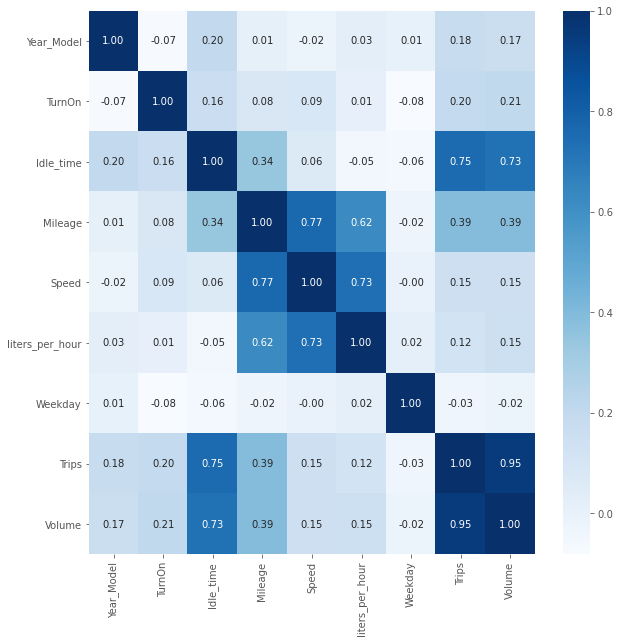

In [12]:
fig = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df0.iloc[:,0:11].corr(), annot=True, fmt='0.2f', cmap='Blues')
plt.yticks(rotation=0)
# plt.savefig(f'figures/correlations1.png')
plt.show()

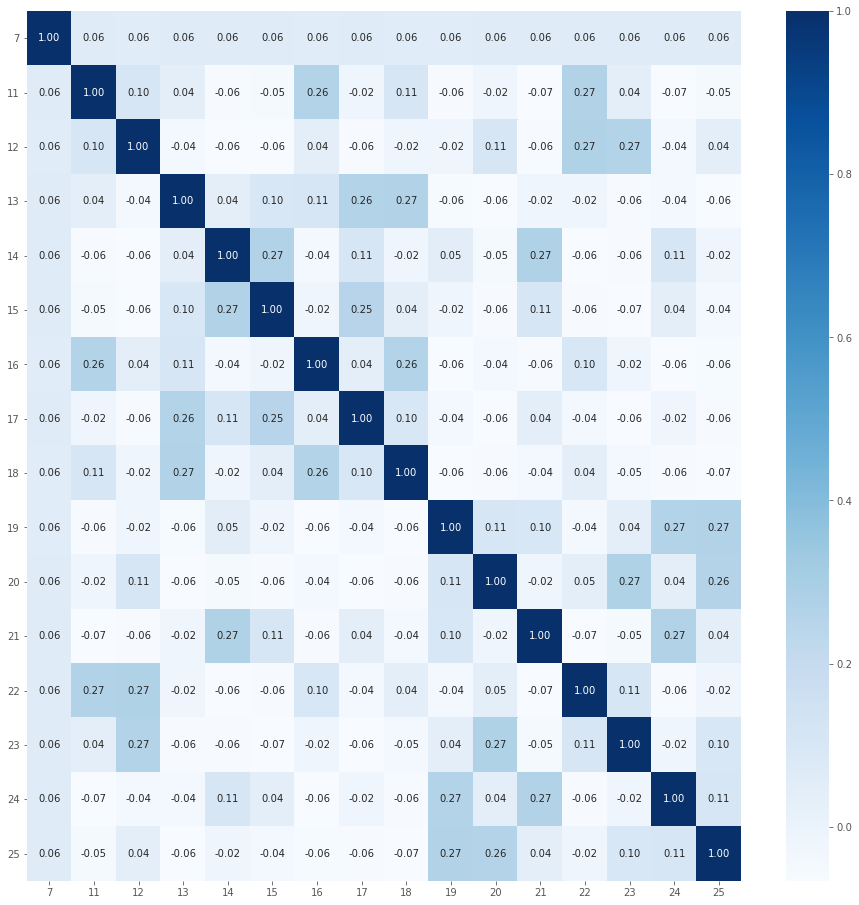

In [13]:
subset = [7,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
fig = plt.subplots(figsize=(16,16))
ax = sns.heatmap(df0.iloc[:,subset].corr(), annot=True, fmt='0.2f', cmap='Blues',xticklabels=subset,yticklabels=subset)
plt.yticks(rotation=0)
# plt.savefig(f'figures/correlations2.png')
plt.show()

In [14]:
df1 = df0.dropna(subset=['liters_per_hour'])
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          418905 non-null  float64
 1   Manufacturer                                                                        418905 non-null  object 
 2   City                                                                                418905 non-null  object 
 3   TurnOn                                                                              418905 non-null  int64  
 4   Idle_time                                                                           418905 non-null  float64
 5   Mileage                                                                             40

In [15]:
# df1.to_excel('dataset/data_v2.xlsx')

In [16]:
oe_manufacturer = OneHotEncoder()
oe_results_m = oe_manufacturer.fit_transform(df1[['Manufacturer']])
manufacturer_ohe = pd.DataFrame(oe_results_m.toarray(), columns=oe_manufacturer.categories_)
print(display(manufacturer_ohe.head(10)))
manufacturer_ohe.columns=np.array(oe_manufacturer.categories_).flatten()
manufacturer_ohe.info()

,Foton Daimler,Freightliner,International,Kenworth,Sinotruk
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Foton Daimler  418905 non-null  float64
 1   Freightliner   418905 non-null  float64
 2   International  418905 non-null  float64
 3   Kenworth       418905 non-null  float64
 4   Sinotruk       418905 non-null  float64
dtypes: float64(5)
memory usage: 16.0 MB


In [17]:
df2 = df1.join(manufacturer_ohe)
### Drop column for Kenworth, before droping it the 29 column corresponded to the manufacturer Kenworth
df2.drop(df2.columns[29],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,City,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H,Foton Daimler,Freightliner,International,Sinotruk
0,2007.0,Kenworth,PUERTO VALLARTA,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007.0,International,PUERTO VALLARTA,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0
2,2007.0,Kenworth,PUERTO VALLARTA,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,2.0,0.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0
3,2005.0,Kenworth,GUADALAJARA,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,International,PUERTO VALLARTA,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2005.0,International,COAHUILA NORTE,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2005.0,International,QUERETARO,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2005.0,International,GUADALAJARA,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2005.0,Kenworth,VERACRUZ,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2006.0,International,MONTERREY,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 30 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          418905 non-null  float64
 1   Manufacturer                                                                        418905 non-null  object 
 2   City                                                                                418905 non-null  object 
 3   TurnOn                                                                              418905 non-null  int64  
 4   Idle_time                                                                           418905 non-null  float64
 5   Mileage                                                                          

In [18]:
### Weekdays (0: Monday to 6: Sunday)
oe_weekday = OneHotEncoder()
oe_results_w = oe_weekday.fit_transform(df2[['Weekday']])
weekday_ohe = pd.DataFrame(oe_results_w.toarray(), columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print(display(weekday_ohe.head(10)))
weekday_ohe.columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_ohe.info()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Monday     418905 non-null  float64
 1   Tuesday    418905 non-null  float64
 2   Wednesday  418905 non-null  float64
 3   Thursday   418905 non-null  float64
 4   Friday     418905 non-null  float64
 5   Saturday   418905 non-null  float64
 6   Sunday     418905 non-null  float64
dtypes: float64(7)
memory usage: 22.4 MB


In [19]:
df2 = df2.join(weekday_ohe)
### Drop column for Friday, before droping it the 34 column corresponded to the label Friday
df2.drop(df2.columns[34],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,City,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,Foton Daimler,Freightliner,International,Sinotruk,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday
0,2007.0,Kenworth,PUERTO VALLARTA,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2007.0,International,PUERTO VALLARTA,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2007.0,Kenworth,PUERTO VALLARTA,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2005.0,Kenworth,GUADALAJARA,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2005.0,International,PUERTO VALLARTA,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2005.0,International,COAHUILA NORTE,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2005.0,International,QUERETARO,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2005.0,International,GUADALAJARA,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2005.0,Kenworth,VERACRUZ,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2006.0,International,MONTERREY,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 36 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          418905 non-null  float64
 1   Manufacturer                                                                        418905 non-null  object 
 2   City                                                                                418905 non-null  object 
 3   TurnOn                                                                              418905 non-null  int64  
 4   Idle_time                                                                           418905 non-null  float64
 5   Mileage                                                                          

In [20]:
oe_city = OneHotEncoder()
oe_results_c = oe_city.fit_transform(df2[['City']])
city_ohe = pd.DataFrame(oe_results_c.toarray(), columns=oe_city.categories_)
print(display(city_ohe.head(10)))
city_ohe.columns=np.array(oe_city.categories_).flatten()
city_ohe.info()

,ACAPULCO,AGUASCALIENTES,BASE AEREA SANTA LUCIA,CAMPECHE,CANCUN,CD. DEL CARMEN,CD. GUZMAN,CD. OBREGON,CD. VICTORIA,CELAYA,...,TOLUCA,TOLUCA CCE,TORREON,TUXTLA GUTIERREZ,URUAPAN,VERACRUZ,VILLAHERMOSA,XALAPA,ZACATECAS,ZAMORA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 79 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ACAPULCO                   418905 non-null  float64
 1   AGUASCALIENTES             418905 non-null  float64
 2   BASE AEREA SANTA LUCIA     418905 non-null  float64
 3   CAMPECHE                   418905 non-null  float64
 4   CANCUN                     418905 non-null  float64
 5   CD. DEL CARMEN             418905 non-null  float64
 6   CD. GUZMAN                 418905 non-null  float64
 7   CD. OBREGON                418905 non-null  float64
 8   CD. VICTORIA               418905 non-null  float64
 9   CELAYA                     418905 non-null  float64
 10  CHETUMAL                   418905 non-null  float64
 11  COAHUILA NORTE             418905 non-null  float64
 12  COATZACOALCOS              418905 non-null  float64
 13  COLIMA                  

In [21]:
df2 = df2.join(city_ohe)
### Drop column for MEXICO DF, before droping it the 80 column corresponded to the label MEXICO DF
df2.drop(df2.columns[80],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,City,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,TOLUCA,TOLUCA CCE,TORREON,TUXTLA GUTIERREZ,URUAPAN,VERACRUZ,VILLAHERMOSA,XALAPA,ZACATECAS,ZAMORA
0,2007.0,Kenworth,PUERTO VALLARTA,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007.0,International,PUERTO VALLARTA,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,Kenworth,PUERTO VALLARTA,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005.0,Kenworth,GUADALAJARA,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,International,PUERTO VALLARTA,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005.0,International,COAHUILA NORTE,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,International,QUERETARO,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005.0,International,GUADALAJARA,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2005.0,Kenworth,VERACRUZ,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,2006.0,International,MONTERREY,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Columns: 114 entries, Year_Model to ZAMORA
dtypes: float64(110), int64(2), object(2)
memory usage: 364.3+ MB


In [22]:
oe_year = OneHotEncoder()
oe_results_y = oe_year.fit_transform(df2[['Year_Model']])
year_ohe = pd.DataFrame(oe_results_y.toarray(), columns=oe_year.categories_)
print(display(year_ohe.head(10)))
year_ohe.columns=['2005','2006','2007','2008','2013','2014','2017','2018','2019','2020']
year_ohe.info()

,2005.0,2006.0,2007.0,2008.0,2013.0,2014.0,2017.0,2018.0,2019.0,2020.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2005    418905 non-null  float64
 1   2006    418905 non-null  float64
 2   2007    418905 non-null  float64
 3   2008    418905 non-null  float64
 4   2013    418905 non-null  float64
 5   2014    418905 non-null  float64
 6   2017    418905 non-null  float64
 7   2018    418905 non-null  float64
 8   2019    418905 non-null  float64
 9   2020    418905 non-null  float64
dtypes: float64(10)
memory usage: 32.0 MB


In [23]:
df2 = df2.join(year_ohe)
### Drop column for 2007, before droping it the 116 column corresponded to the label 2007
df2.drop(df2.columns[116],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,City,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,ZAMORA,2005,2006,2008,2013,2014,2017,2018,2019,2020
0,2007.0,Kenworth,PUERTO VALLARTA,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007.0,International,PUERTO VALLARTA,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,Kenworth,PUERTO VALLARTA,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005.0,Kenworth,GUADALAJARA,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,International,PUERTO VALLARTA,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005.0,International,COAHUILA NORTE,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,International,QUERETARO,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005.0,International,GUADALAJARA,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2005.0,Kenworth,VERACRUZ,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2006.0,International,MONTERREY,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Columns: 123 entries, Year_Model to 2020
dtypes: float64(119), int64(2), object(2)
memory usage: 393.1+ MB


In [24]:
# ### Another approach to categorical/indicator variables using get_dummiyes properly
# import pandas as pd

# from pandas.api.types import CategoricalDtype 

# # say you want a column for "japan" too (it'll be always zero, of course)
# df["country"] = train_df["country"].astype(CategoricalDtype(["australia","germany","korea","russia","japan"]))

# # now call .get_dummies() as usual
# pd.get_dummies(df["country"],prefix='country')

In [25]:
# df2.to_excel("dataset/final_data.xlsx")

In [26]:
data = df2.drop(['Year_Model','Manufacturer','City','Weekday'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Columns: 119 entries, TurnOn to 2020
dtypes: float64(118), int64(1)
memory usage: 380.3 MB


In [27]:
data.drop(['Mileage'], axis=1, inplace=True)

In [28]:
# data = data.dropna(subset=['Mileage'],axis=0)
# data.reset_index(inplace=True)
# data.drop('index',axis=1,inplace=True)
# data.info()

In [29]:
pd.set_option('max_columns', None)

In [30]:
display(data.head(3))

,TurnOn,Idle_time,Speed,liters_per_hour,Trips,Volume,Acceleration High level,Brake High Level,CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h,CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM - Freno de motor accionado y revoluciones menores a 1300,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H,Foton Daimler,Freightliner,International,Sinotruk,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday,ACAPULCO,AGUASCALIENTES,BASE AEREA SANTA LUCIA,CAMPECHE,CANCUN,CD. DEL CARMEN,CD. GUZMAN,CD. OBREGON,CD. VICTORIA,CELAYA,CHETUMAL,COAHUILA NORTE,COATZACOALCOS,COLIMA,COZUMEL,CUAUTLA,CUERNAVACA,CULIACAN,DURANGO,ENSENADA,EOLICA FENICIAS REYNOSA,EOLICAS,EOLICAS OAXACA,EOLICO DOLORES REYNOSA,EOLICO SANTA CRUZ,EOLICO SANTA CRUZ REYNOSA,EOLICO SANTIAGO,EOLICO SANTIAGO LEON,EOLICOS PUEBLA,GUADALAJARA,GUAYMAS,HERMOSILLO,IRAPUATO,LA PAZ,LAGOS DE MORENO,LAZARO CARDENAS,LEON,LOS CABOS,LOS MOCHIS,MANZANILLO,MATAMOROS,MAZATLAN,MERIDA,MEXICALI,MONTERREY,MORELIA,NUEVO LAREDO,OAXACA,ORIZABA,P,PACHUCA,POZA RICA,PUEBLA,PUERTO VALLARTA,QUERETARO,REFINERIA DOS BOCAS,REYNOSA,SALINA CRUZ,SALTILLO,SAN JUAN DEL RIO,SAN LUIS POTOSI,TAMPICO,TAPACHULA,TEPATITLAN,TEPIC,TIJUANA,TIZAPA,TLAXCALA,TOLUCA,TOLUCA CCE,TORREON,TUXTLA GUTIERREZ,URUAPAN,VERACRUZ,VILLAHERMOSA,XALAPA,ZACATECAS,ZAMORA,2005,2006,2008,2013,2014,2017,2018,2019,2020
0,6,6.550000,2.30,5.283019,2.0,9.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.466667,25.55,8.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.283333,12.27,7.962085,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data.drop(data.columns[0:3],axis=1,inplace=True)
display(data.head(3))

,liters_per_hour,Trips,Volume,Acceleration High level,Brake High Level,CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h,CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM - Freno de motor accionado y revoluciones menores a 1300,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H,Foton Daimler,Freightliner,International,Sinotruk,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday,ACAPULCO,AGUASCALIENTES,BASE AEREA SANTA LUCIA,CAMPECHE,CANCUN,CD. DEL CARMEN,CD. GUZMAN,CD. OBREGON,CD. VICTORIA,CELAYA,CHETUMAL,COAHUILA NORTE,COATZACOALCOS,COLIMA,COZUMEL,CUAUTLA,CUERNAVACA,CULIACAN,DURANGO,ENSENADA,EOLICA FENICIAS REYNOSA,EOLICAS,EOLICAS OAXACA,EOLICO DOLORES REYNOSA,EOLICO SANTA CRUZ,EOLICO SANTA CRUZ REYNOSA,EOLICO SANTIAGO,EOLICO SANTIAGO LEON,EOLICOS PUEBLA,GUADALAJARA,GUAYMAS,HERMOSILLO,IRAPUATO,LA PAZ,LAGOS DE MORENO,LAZARO CARDENAS,LEON,LOS CABOS,LOS MOCHIS,MANZANILLO,MATAMOROS,MAZATLAN,MERIDA,MEXICALI,MONTERREY,MORELIA,NUEVO LAREDO,OAXACA,ORIZABA,P,PACHUCA,POZA RICA,PUEBLA,PUERTO VALLARTA,QUERETARO,REFINERIA DOS BOCAS,REYNOSA,SALINA CRUZ,SALTILLO,SAN JUAN DEL RIO,SAN LUIS POTOSI,TAMPICO,TAPACHULA,TEPATITLAN,TEPIC,TIJUANA,TIZAPA,TLAXCALA,TOLUCA,TOLUCA CCE,TORREON,TUXTLA GUTIERREZ,URUAPAN,VERACRUZ,VILLAHERMOSA,XALAPA,ZACATECAS,ZAMORA,2005,2006,2008,2013,2014,2017,2018,2019,2020
0,5.283019,2.0,9.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.962085,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data.drop(data.columns[1:18],axis=1,inplace=True)
display(data.head(3))

,liters_per_hour,Foton Daimler,Freightliner,International,Sinotruk,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday,ACAPULCO,AGUASCALIENTES,BASE AEREA SANTA LUCIA,CAMPECHE,CANCUN,CD. DEL CARMEN,CD. GUZMAN,CD. OBREGON,CD. VICTORIA,CELAYA,CHETUMAL,COAHUILA NORTE,COATZACOALCOS,COLIMA,COZUMEL,CUAUTLA,CUERNAVACA,CULIACAN,DURANGO,ENSENADA,EOLICA FENICIAS REYNOSA,EOLICAS,EOLICAS OAXACA,EOLICO DOLORES REYNOSA,EOLICO SANTA CRUZ,EOLICO SANTA CRUZ REYNOSA,EOLICO SANTIAGO,EOLICO SANTIAGO LEON,EOLICOS PUEBLA,GUADALAJARA,GUAYMAS,HERMOSILLO,IRAPUATO,LA PAZ,LAGOS DE MORENO,LAZARO CARDENAS,LEON,LOS CABOS,LOS MOCHIS,MANZANILLO,MATAMOROS,MAZATLAN,MERIDA,MEXICALI,MONTERREY,MORELIA,NUEVO LAREDO,OAXACA,ORIZABA,P,PACHUCA,POZA RICA,PUEBLA,PUERTO VALLARTA,QUERETARO,REFINERIA DOS BOCAS,REYNOSA,SALINA CRUZ,SALTILLO,SAN JUAN DEL RIO,SAN LUIS POTOSI,TAMPICO,TAPACHULA,TEPATITLAN,TEPIC,TIJUANA,TIZAPA,TLAXCALA,TOLUCA,TOLUCA CCE,TORREON,TUXTLA GUTIERREZ,URUAPAN,VERACRUZ,VILLAHERMOSA,XALAPA,ZACATECAS,ZAMORA,2005,2006,2008,2013,2014,2017,2018,2019,2020
0,5.283019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.035714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.962085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Now need to do Train Test split and afterwards StandardScale all the numerical variables in each set seperately

In [33]:
### Train Test split
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42, shuffle=True)

In [34]:
X_train = data_train.loc[:, data_train.columns != 'liters_per_hour'].values
y_train = data_train['liters_per_hour'].values

X_test = data_test.loc[:, data_test.columns != 'liters_per_hour'].values
y_test = data_test['liters_per_hour'].values

In [62]:
def cval_model(X_train,y_train, model='RandomForest', cv=True, LR=0.1):
    '''
    runs crossvalidation in the specified model and returns the MSE and R2 metrics according to the train dataset
    '''
    scores = np.zeros(2)
    if model == 'RandomForest':
        model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)
    elif model == 'GradientBoostin':
        model = GradientBoostingRegressor(learning_rate=LR, n_estimators=100, random_state=1)
    else:
        model = AdaBoostRegressor(DecisionTreeClassifier(), learning_rate=LR, n_estimators=100, random_state=1)
    model.fit(X_train, y_train)
    if cv:
        scores[0] = -1*cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()
        scores[1] = cross_val_score(model, X_train, y_train, scoring= 'r2', cv=5).mean()
    return scores

In [ ]:
scores_rf = cval_model(X_train,y_train,model='RandomForest',cv=True)
scores_gdbr = cval_model(X_train,y_train,model='GradientBoostin',cv=True)

print(f'RandomForestClassifier       Train CV    |   MSE: {round(scores_rf[0],3)}   |   R2: {round(scores_rf[1],3)}')
print(f'GradientBoostinClassifier    Train CV    |   MSE: {round(scores_gdbr[0],3)}  |   R2: {round(scores_gdbr[1],3)}')

In [ ]:
### Packages require to adjust Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
X2_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

### I did not expect all features to be relevant according to the p-value (except for 2 or 4 features only: 29, 30, 33, 35) and some cities
### Doubt: How to interpret coefficients with non-standarized data?

In [ ]:
print(data.columns)

In [ ]:
y_train_pred_lr = est2.predict(X2_train)
lr_train_MSE_score = mean_squared_error(y_train, y_train_pred_lr)
print("MSE for the Multiple Linear Regression in the Train data:", round(lr_train_MSE_score,4))
lr_train_R2_score = r2_score(y_train, y_train_pred_lr)
print("R2 for the Multiple Linear Regression in the Train data:", round(lr_train_R2_score,4))

X2_test = sm.add_constant(X_test)
y_test_pred_lr = est2.predict(X2_test)
lr_test_MSE_score = mean_squared_error(y_test, y_test_pred_lr)
print("MSE for the Multiple Linear Regression in the Test data:", round(lr_test_MSE_score,4))
lr_test_R2_score = r2_score(y_test, y_test_pred_lr)
print("R2 for the Multiple Linear Regression in the Test data:", round(lr_test_R2_score,4))

In [35]:
### Adjusting Best model to answer the following questions

best_rf = RandomForestRegressor(n_estimators=80, n_jobs=-1, random_state=1, max_features='sqrt',
                                min_samples_leaf=2, min_samples_split=2, max_depth=None, bootstrap=False)
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=80, n_jobs=-1, random_state=1)

In [36]:
best_rf_y_train_pred = best_rf.predict(X_train)
best_rf_train_MSE_score = mean_squared_error(y_train, best_rf_y_train_pred)
print("MSE for the Best Random Forest in the Train data:", round(best_rf_train_MSE_score,4))
best_rf_train_R2_score = r2_score(y_train, best_rf_y_train_pred)
print("R2 for the Best Random Forest in the Train data:", round(best_rf_train_R2_score,4))

best_rf_y_test_pred = best_rf.predict(X_test)
best_rf_test_MSE_score = mean_squared_error(y_test, best_rf_y_test_pred)
print("MSE for the Best Random Forest in the Test data:", round(best_rf_test_MSE_score,4))
best_rf_test_R2_score = r2_score(y_test, best_rf_y_test_pred)
print("R2 for the Best Random Forest in the Test data:", round(best_rf_test_R2_score,4))

### Clearly only using Categorical values does not work well
# MSE for the Best Random Forest in the Train data: 4.6254
# R2 for the Best Random Forest in the Train data: 0.1754
# MSE for the Best Random Forest in the Test data: 4.7484
# R2 for the Best Random Forest in the Test data: 0.1559

MSE for the Best Random Forest in the Train data: 4.6254
R2 for the Best Random Forest in the Train data: 0.1754
MSE for the Best Random Forest in the Test data: 4.7484
R2 for the Best Random Forest in the Test data: 0.1559


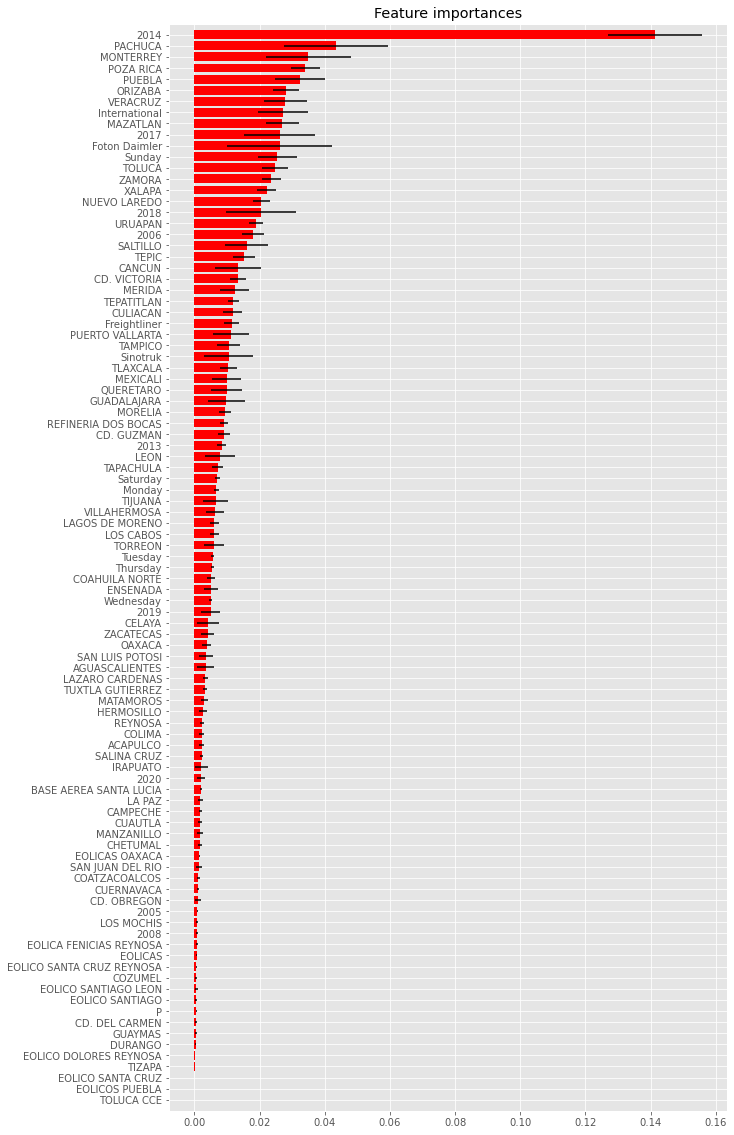

In [40]:
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize=(10,20))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), data_train.loc[:, data_train.columns != 'liters_per_hour'].columns[indices[::1]])
plt.ylim([-1, X_train.shape[1]])
plt.savefig(f'figures/feature_importances_categorical.png')
plt.show()